# VGG16
## Import library

In [1]:
import os
import time
import platform
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from itertools import chain
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.applications.vgg16 
import tensorflow.keras.applications.vgg19
from tensorflow.keras.applications import VGG16
import tensorflow.keras.applications.resnet50
import tensorflow.keras.applications.xception
import tensorflow.keras.applications.inception_v3
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras import initializers, Model
from tensorflow.keras import regularizers

## Function definitions

In [2]:
def build_fileDatabases(data_dir):
    os.chdir(data_dir)
    fileDatabases = []
    classNames = []

    for dirpath,dirnames ,filenames in os.walk(data_dir):        
        if filenames:     
            if platform.system() == "Linux":
                path = dirpath.split('/')
            else:
                path = dirpath.split('\\')
        else:
            continue
    
        if path[-3][0] == '#': #Nazwy folderów poprzedzone znakime # nie będą zawarte w bazie danych
            #print('contains #')
            continue
    
        for i in range(len(path)):
            if path[i] == 'Left':# or path[i] == 'Right':
                className = path[i-2]
                classNames.append(className)
    
                filenames_images = []
    
                for i in range(len(filenames)):
                    if filenames[i][-3:] == 'jpg':              
                        filenames_images.append(os.path.join(dirpath,filenames[i]))
    
                fileDatabases.append(filenames_images) 

    classNumber = len(set(classNames))
    classDict = dict(zip(set(classNames),range(classNumber)))
    print('Słownik obiektów: \n',classDict)
    return fileDatabases, classDict, classNames

def read_images(fileDatabases, img_width, img_height):
    data = []  
    for i in range(len(fileDatabases)):
        data.append([])
        for j in range(len(fileDatabases[i])): 
            image = load_img(fileDatabases[i][j], target_size=(img_height, img_width))
            image = img_to_array(image)
            image = tensorflow.keras.applications.vgg16.preprocess_input(image)
            data[i].append(image)
                
    return data

def build_input_data(data, classDict, classNames, test_size,random_state):
    trainX = [] 
    trainY = []    
    #valX = [] 
    #valY = []     
    testX = [] 
    testY = []     
  
    for i in range(len(data)): 
        
        labels = []
        
        for j in range(len(data[i])):
            labels.append(classNames[i])
        
        (trainX_temp, testX_temp, trainY_temp, testY_temp) = train_test_split(data[i], labels,
     	test_size=test_size, random_state=random_state)
        testX.append(testX_temp)
        testY.append(testY_temp)
        
        #(trainX_temp, testX_temp, trainY_temp, testY_temp) = train_test_split(trainX_temp, trainY_temp,
     	#test_size=valid_size, random_state=random_state) 
        
        #valX.append(testX_temp)
        #valY.append(testY_temp)
        
        trainX.append(trainX_temp)
        trainY.append(trainY_temp)
        
    trainX = list(chain.from_iterable(trainX)) 
    #valX = list(chain.from_iterable(valX))
    testX = list(chain.from_iterable(testX))
    
    trainY_long = []
    #valY_long = []
    testY_long = []
    
    for i in range(len(trainY)):
        for j in range(len(trainY[i])):
            trainY_long.append(classDict.get(trainY[i][j]))
            
    #for i in range(len(valY)):
    #    for j in range(len(valY[i])):
    #        valY_long.append(classDict.get(valY[i][j]))
            
    for i in range(len(testY)):
        for j in range(len(testY[i])):
            testY_long.append(classDict.get(testY[i][j]))
            
    trainX = np.array(trainX, dtype="float")
    print('Number of images in train set: {}'.format(trainX.shape[0]))
    #valX = np.array(valX, dtype="float")
    #print('Number of images in  validation set: {}'.format(valX.shape[0]))
    testX = np.array(testX, dtype="float")
    print('Number of images in test set: {}'.format(testX.shape[0]))
    trainY = np.array(trainY_long)
    print('Number of labels in train set: {}'.format(trainY.shape[0]))
    #valY = np.array(valY_long)
    #print('Number of labels in validation set: {}'.format(valY.shape[0]))
    testY = np.array(testY_long)
    print('Number of labels in test set: {}'.format(testY.shape[0]))
    
    trainY_cat = to_categorical(trainY)
    #valY_cat = to_categorical(valY)
    testY_cat = to_categorical(testY)
    
    return trainX, testX, trainY_cat, testY_cat # valX, , valY_cat                        

## Path creation

In [3]:
if platform.system() == "Linux":
    parentDir = "/home/cv/Models"
    modelsDir = '/home/cv/AlliedRecording1'
else:
    parentDir = "C:\\Users\\stann\\Spyder_projects\\Models"
    modelsDir = 'C:\\AlliedRecording1'

## Training parameters

In [4]:
model_name = "VGG16"
img_height = 224
img_width = 224
batch_size = 32
test_size = 0.2
rotation_range=15
width_shift_range=0.1
height_shift_range=0.1
shear_range=0.1
zoom_range=0.1 #0.1
horizontal_flip=True
vertical_flip=True
fill_mode='nearest'
epochs = 200

## Build train / test sets

In [5]:
random_state = 1000
fileDatabases, classDict, classNames = build_fileDatabases(modelsDir)
data = read_images(fileDatabases, img_width, img_height)
trainX, testX, trainY_cat, testY_cat = build_input_data(data, classDict, classNames, 0.2, random_state) 

Słownik obiektów: 
 {'usb': 0, 'Auxxx': 1, 'wentylator': 2, '2xUSB': 3, 'wiatrak': 4, 'plytka': 5, 'cewka': 6, 'wyswietlacz': 7, 'wykladzina': 8, 'piny': 9, 'zlacze': 10}
Number of images in train set: 3172
Number of images in test set: 822
Number of labels in train set: 3172
Number of labels in test set: 822


## Model compilaton

In [6]:
K.clear_session() 
classNumber = len(trainY_cat[0])
core = VGG16(input_shape=(img_height,img_width,3),weights='imagenet',include_top=False, classes=classNumber)

for layer in core.layers:
    layer.trainable = False
            
i = Input([img_height, img_width, 3])
x = core(i)
x = Flatten()(x)
x = Dense(256,activation='relu')(x)
x = Dense(256,activation='relu')(x)
x = Dense(classNumber,activation='softmax')(x)
model = Model(inputs=[i], outputs=[x])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])  

## Model training

In [7]:
test = 1
folderPath = os.path.join(parentDir,model_name+str(test))
if os.path.isdir(folderPath):
    shutil.rmtree(folderPath)       
os.makedirs(folderPath)

checkPointPath = os.path.join(folderPath,"checkpoint")
#earlyStopping = EarlyStopping(monitor = 'accuracy', patience = 15)
modelCheckpoint = ModelCheckpoint(checkPointPath, monitor = 'val_loss',save_best_only=True,save_weights_only=True)  
callbacks_list = [modelCheckpoint]  #earlyStopping,
  
imgGen_train = ImageDataGenerator(rotation_range=rotation_range, width_shift_range=width_shift_range,height_shift_range=height_shift_range,
                          shear_range=shear_range,zoom_range=zoom_range,horizontal_flip=horizontal_flip,fill_mode=fill_mode)
imgGen_train.fit(trainX)

start = time.time()
hist = model.fit(imgGen_train.flow(trainX,trainY_cat,batch_size = batch_size),
                    validation_data= (testX,testY_cat), 
                    epochs=epochs,verbose=1, callbacks=callbacks_list)
end = time.time()
elapsedTime = end - start

print('Training time: {}'.format(elapsedTime))

model.load_weights(checkPointPath)
modelPath = os.path.join(folderPath,"model")
historyPath = os.path.join(folderPath,"history.npy")
model.save(modelPath)
np.save(historyPath,hist.history)

#loss, accuracy = model.evaluate(trainX,trainY_cat,verbose=1)
#print('Accuracy in train set: {0:5.2f}'.format(accuracy))



Epoch 1/200
100/100 [==============================] - 29s 239ms/step - loss: 1.9615 - accuracy: 0.6283 - val_loss: 0.5259 - val_accuracy: 0.8382
Epoch 2/200
100/100 [==============================] - 21s 207ms/step - loss: 0.5217 - accuracy: 0.8339 - val_loss: 0.2965 - val_accuracy: 0.9027
Epoch 3/200
100/100 [==============================] - 21s 208ms/step - loss: 0.3881 - accuracy: 0.8730 - val_loss: 0.2440 - val_accuracy: 0.9209
Epoch 4/200
100/100 [==============================] - 21s 206ms/step - loss: 0.3023 - accuracy: 0.9032 - val_loss: 0.2880 - val_accuracy: 0.9197
Epoch 5/200
100/100 [==============================] - 20s 204ms/step - loss: 0.2605 - accuracy: 0.9224 - val_loss: 0.2322 - val_accuracy: 0.9343
Epoch 6/200
100/100 [==============================] - 20s 202ms/step - loss: 0.2809 - accuracy: 0.9149 - val_loss: 0.3887 - val_accuracy: 0.8954
Epoch 7/200
100/100 [==============================] - 20s 203ms/step - loss: 0.2503 - accuracy: 0.9237 - val_loss: 0.2165 -

Epoch 57/200
100/100 [==============================] - 21s 205ms/step - loss: 0.0379 - accuracy: 0.9874 - val_loss: 0.1703 - val_accuracy: 0.9611
Epoch 58/200
100/100 [==============================] - 20s 203ms/step - loss: 0.0760 - accuracy: 0.9741 - val_loss: 0.1889 - val_accuracy: 0.9550
Epoch 59/200
100/100 [==============================] - 21s 206ms/step - loss: 0.0741 - accuracy: 0.9786 - val_loss: 0.2473 - val_accuracy: 0.9526
Epoch 60/200
100/100 [==============================] - 20s 203ms/step - loss: 0.0930 - accuracy: 0.9776 - val_loss: 0.1604 - val_accuracy: 0.9513
Epoch 61/200
100/100 [==============================] - 21s 205ms/step - loss: 0.0498 - accuracy: 0.9849 - val_loss: 0.1725 - val_accuracy: 0.9586
Epoch 62/200
100/100 [==============================] - 21s 211ms/step - loss: 0.0492 - accuracy: 0.9868 - val_loss: 0.1565 - val_accuracy: 0.9574
Epoch 63/200
100/100 [==============================] - 21s 209ms/step - loss: 0.0394 - accuracy: 0.9868 - val_loss: 0

100/100 [==============================] - 20s 203ms/step - loss: 0.0339 - accuracy: 0.9931 - val_loss: 0.2175 - val_accuracy: 0.9538
Epoch 168/200
100/100 [==============================] - 20s 203ms/step - loss: 0.0421 - accuracy: 0.9896 - val_loss: 0.2228 - val_accuracy: 0.9623
Epoch 169/200
100/100 [==============================] - 20s 203ms/step - loss: 0.0697 - accuracy: 0.9877 - val_loss: 0.2186 - val_accuracy: 0.9647
Epoch 170/200
100/100 [==============================] - 20s 203ms/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.1824 - val_accuracy: 0.9647
Epoch 171/200
100/100 [==============================] - 20s 203ms/step - loss: 0.0301 - accuracy: 0.9937 - val_loss: 0.2127 - val_accuracy: 0.9672
Epoch 172/200
100/100 [==============================] - 20s 202ms/step - loss: 0.0257 - accuracy: 0.9921 - val_loss: 0.2555 - val_accuracy: 0.9465
Epoch 173/200
100/100 [==============================] - 20s 204ms/step - loss: 0.0388 - accuracy: 0.9877 - val_loss: 0.1167 -

## Model accuracy

In [8]:
loss, accuracy = model.evaluate(testX,testY_cat,verbose=1)
print('Accuracy in test set: {0:5.4f}'.format(accuracy))

start = time.time()
model.predict(trainX)
end = time.time()    
exec_time = end - start
print('Execution time: {}'.format(exec_time))

26/26 [==============================] - 2s 61ms/step - loss: 0.0696 - accuracy: 0.9842
Accuracy in test set: 0.9842
Execution time: 7.7012856006622314


## Learning curves

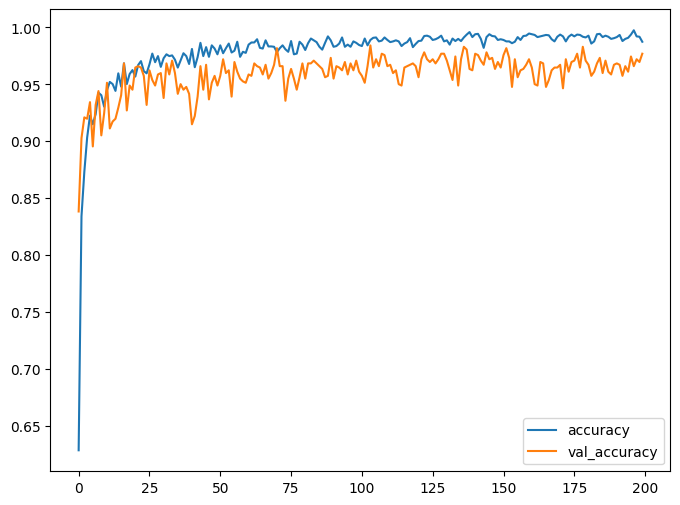

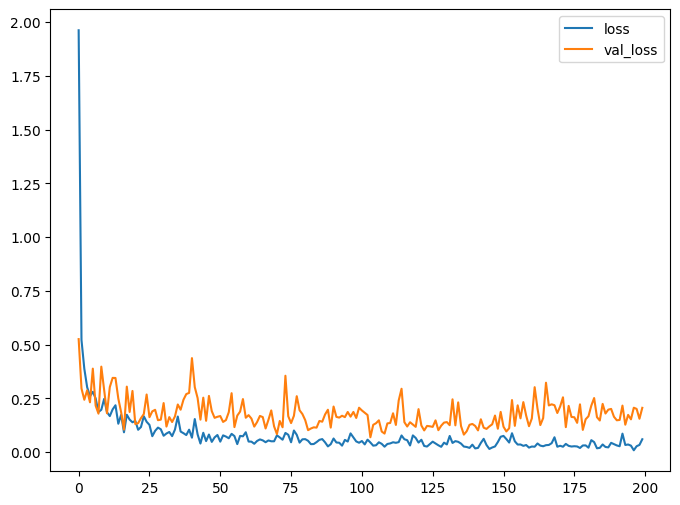

In [9]:
accuracyPlot = plt.figure()
plt.close('all')
plt.figure(1, figsize=(8,6))
plt.plot(hist.history['accuracy'],label = 'accuracy')
plt.plot(hist.history['val_accuracy'],label = 'val_accuracy')
plt.legend()
#plt.savefig('PartClassification/AccuracyNet1.png', dpi=300)

plt.figure(2, figsize=(8,6))
plt.plot(hist.history['loss'],label = 'loss')
plt.plot(hist.history['val_loss'],label = 'val_loss')
plt.legend()
#plt.savefig('PartClassification/LossNet1.png', dpi=300)
plt.show()

## Confusion matrix

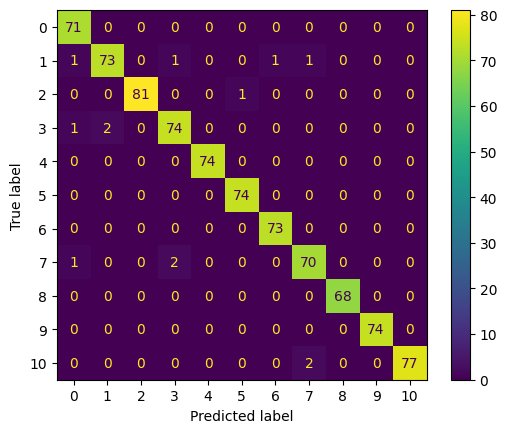

In [10]:
predictY = model.predict(testX).argmax(axis=1)
testY = np.argmax(testY_cat, axis=-1)
conf_matrix = confusion_matrix(testY,predictY)
ConfusionMatrixDisplay.from_predictions(testY,predictY)

### Test 2

In [11]:
random_state = 1000
fileDatabases, classDict, classNames = build_fileDatabases(modelsDir)
data = read_images(fileDatabases, img_width, img_height)
trainX, testX, trainY_cat, testY_cat = build_input_data(data, classDict, classNames, 0.2, random_state) 

Słownik obiektów: 
 {'usb': 0, 'Auxxx': 1, 'wentylator': 2, '2xUSB': 3, 'wiatrak': 4, 'plytka': 5, 'cewka': 6, 'wyswietlacz': 7, 'wykladzina': 8, 'piny': 9, 'zlacze': 10}
Number of images in train set: 3172
Number of images in test set: 822
Number of labels in train set: 3172
Number of labels in test set: 822


In [12]:
K.clear_session() 
classNumber = len(trainY_cat[0])
core = VGG16(input_shape=(img_height,img_width,3),weights='imagenet',include_top=False, classes=classNumber)

for layer in core.layers:
    layer.trainable = False
            
i = Input([img_height, img_width, 3])
x = core(i)
x = Flatten()(x)
x = Dense(256,activation='relu')(x)
x = Dense(256,activation='relu')(x)
x = Dense(classNumber,activation='softmax')(x)
model = Model(inputs=[i], outputs=[x])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])  

In [13]:
test = 2
folderPath = os.path.join(parentDir,model_name+str(test))
if os.path.isdir(folderPath):
    shutil.rmtree(folderPath)       
os.makedirs(folderPath)

checkPointPath = os.path.join(folderPath,"checkpoint")
#earlyStopping = EarlyStopping(monitor = 'accuracy', patience = 15)
modelCheckpoint = ModelCheckpoint(checkPointPath, monitor = 'val_loss',save_best_only=True,save_weights_only=True)  
callbacks_list = [modelCheckpoint]  #earlyStopping,
  
imgGen_train = ImageDataGenerator(rotation_range=rotation_range, width_shift_range=width_shift_range,height_shift_range=height_shift_range,
                          shear_range=shear_range,zoom_range=zoom_range,horizontal_flip=horizontal_flip,fill_mode=fill_mode)
imgGen_train.fit(trainX)

start = time.time()
hist = model.fit(imgGen_train.flow(trainX,trainY_cat,batch_size = batch_size),
                    validation_data= (testX,testY_cat), 
                    epochs=epochs,verbose=1, callbacks=callbacks_list)
end = time.time()
elapsedTime = end - start

print('Training time: {}'.format(elapsedTime))

model.load_weights(checkPointPath)
modelPath = os.path.join(folderPath,"model")
historyPath = os.path.join(folderPath,"history.npy")
model.save(modelPath)
np.save(historyPath,hist.history)

Epoch 1/200
100/100 [==============================] - 22s 209ms/step - loss: 2.1762 - accuracy: 0.6195 - val_loss: 0.8818 - val_accuracy: 0.7494
Epoch 2/200
100/100 [==============================] - 21s 205ms/step - loss: 0.5171 - accuracy: 0.8320 - val_loss: 0.5026 - val_accuracy: 0.8516
Epoch 3/200
100/100 [==============================] - 21s 208ms/step - loss: 0.3862 - accuracy: 0.8859 - val_loss: 0.2293 - val_accuracy: 0.9270
Epoch 4/200
100/100 [==============================] - 21s 206ms/step - loss: 0.3197 - accuracy: 0.9092 - val_loss: 0.3903 - val_accuracy: 0.8881
Epoch 5/200
100/100 [==============================] - 21s 206ms/step - loss: 0.3841 - accuracy: 0.8906 - val_loss: 0.4315 - val_accuracy: 0.8881
Epoch 6/200
100/100 [==============================] - 21s 206ms/step - loss: 0.2824 - accuracy: 0.9177 - val_loss: 0.2263 - val_accuracy: 0.9392
Epoch 7/200
100/100 [==============================] - 21s 205ms/step - loss: 0.2974 - accuracy: 0.9149 - val_loss: 0.2212 -

Epoch 57/200
100/100 [==============================] - 21s 206ms/step - loss: 0.0642 - accuracy: 0.9817 - val_loss: 0.2155 - val_accuracy: 0.9574
Epoch 58/200
100/100 [==============================] - 21s 206ms/step - loss: 0.0380 - accuracy: 0.9877 - val_loss: 0.1724 - val_accuracy: 0.9574
Epoch 59/200
100/100 [==============================] - 21s 206ms/step - loss: 0.0504 - accuracy: 0.9871 - val_loss: 0.1626 - val_accuracy: 0.9562
Epoch 60/200
100/100 [==============================] - 20s 204ms/step - loss: 0.0568 - accuracy: 0.9849 - val_loss: 0.1612 - val_accuracy: 0.9623
Epoch 61/200
100/100 [==============================] - 20s 204ms/step - loss: 0.0537 - accuracy: 0.9846 - val_loss: 0.2799 - val_accuracy: 0.9465
Epoch 62/200
100/100 [==============================] - 20s 204ms/step - loss: 0.0894 - accuracy: 0.9782 - val_loss: 0.1876 - val_accuracy: 0.9574
Epoch 63/200
100/100 [==============================] - 20s 204ms/step - loss: 0.0756 - accuracy: 0.9801 - val_loss: 0

100/100 [==============================] - 20s 203ms/step - loss: 0.0404 - accuracy: 0.9905 - val_loss: 0.1233 - val_accuracy: 0.9757
Epoch 168/200
100/100 [==============================] - 20s 203ms/step - loss: 0.0223 - accuracy: 0.9950 - val_loss: 0.1229 - val_accuracy: 0.9781
Epoch 169/200
100/100 [==============================] - 20s 203ms/step - loss: 0.0219 - accuracy: 0.9924 - val_loss: 0.1626 - val_accuracy: 0.9684
Epoch 170/200
100/100 [==============================] - 20s 203ms/step - loss: 0.0438 - accuracy: 0.9909 - val_loss: 0.1691 - val_accuracy: 0.9769
Epoch 171/200
100/100 [==============================] - 20s 204ms/step - loss: 0.0330 - accuracy: 0.9899 - val_loss: 0.1204 - val_accuracy: 0.9732
Epoch 172/200
100/100 [==============================] - 20s 204ms/step - loss: 0.0269 - accuracy: 0.9924 - val_loss: 0.1726 - val_accuracy: 0.9684
Epoch 173/200
100/100 [==============================] - 20s 203ms/step - loss: 0.0172 - accuracy: 0.9946 - val_loss: 0.1815 -

In [14]:
loss, accuracy = model.evaluate(testX,testY_cat,verbose=1)
print('Accuracy in test set: {0:5.4f}'.format(accuracy))

start = time.time()
model.predict(trainX)
end = time.time()    
exec_time = end - start
print('Execution time: {}'.format(exec_time))

26/26 [==============================] - 2s 63ms/step - loss: 0.0572 - accuracy: 0.9830
Accuracy in test set: 0.9830
Execution time: 7.375688552856445


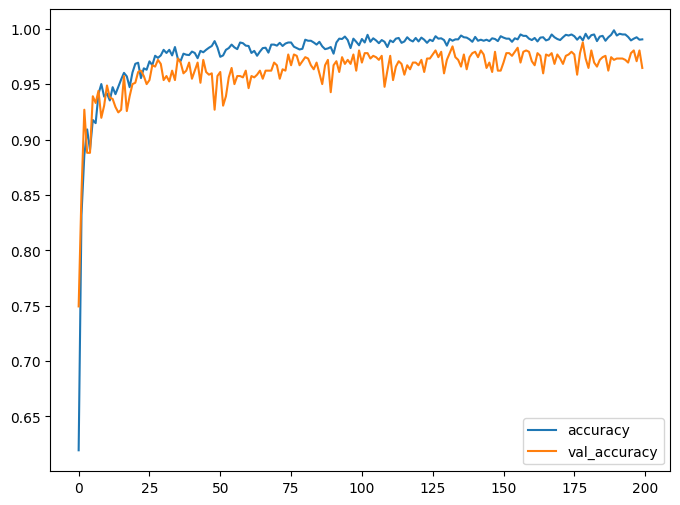

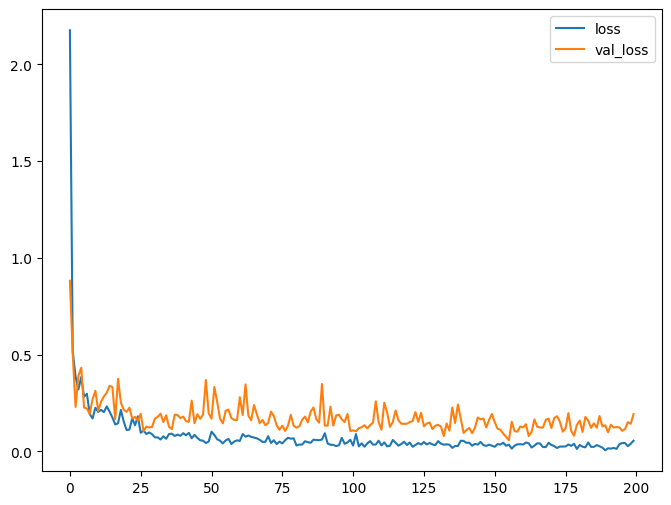

In [15]:
accuracyPlot = plt.figure()
plt.close('all')
plt.figure(1, figsize=(8,6))
plt.plot(hist.history['accuracy'],label = 'accuracy')
plt.plot(hist.history['val_accuracy'],label = 'val_accuracy')
plt.legend()
#plt.savefig('PartClassification/AccuracyNet1.png', dpi=300)

plt.figure(2, figsize=(8,6))
plt.plot(hist.history['loss'],label = 'loss')
plt.plot(hist.history['val_loss'],label = 'val_loss')
plt.legend()
#plt.savefig('PartClassification/LossNet1.png', dpi=300)
plt.show()

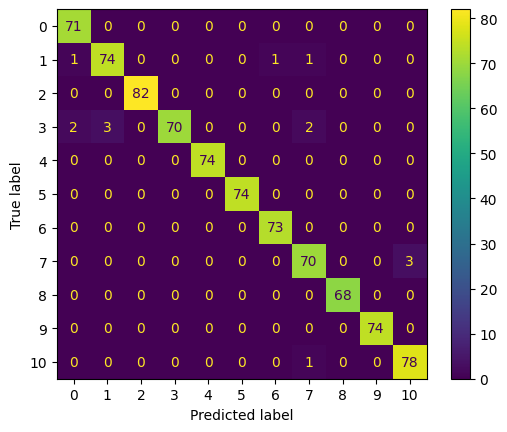

In [16]:
predictY = model.predict(testX).argmax(axis=1)
testY = np.argmax(testY_cat, axis=-1)
conf_matrix = confusion_matrix(testY,predictY)
ConfusionMatrixDisplay.from_predictions(testY,predictY)

### Test 3

In [17]:
random_state = 1000
fileDatabases, classDict, classNames = build_fileDatabases(modelsDir)
data = read_images(fileDatabases, img_width, img_height)
trainX, testX, trainY_cat, testY_cat = build_input_data(data, classDict, classNames, 0.2, random_state) 

Słownik obiektów: 
 {'usb': 0, 'Auxxx': 1, 'wentylator': 2, '2xUSB': 3, 'wiatrak': 4, 'plytka': 5, 'cewka': 6, 'wyswietlacz': 7, 'wykladzina': 8, 'piny': 9, 'zlacze': 10}
Number of images in train set: 3172
Number of images in test set: 822
Number of labels in train set: 3172
Number of labels in test set: 822


In [18]:
K.clear_session() 
classNumber = len(trainY_cat[0])
core = VGG16(input_shape=(img_height,img_width,3),weights='imagenet',include_top=False, classes=classNumber)

for layer in core.layers:
    layer.trainable = False
            
i = Input([img_height, img_width, 3])
x = core(i)
x = Flatten()(x)
x = Dense(256,activation='relu')(x)
x = Dense(256,activation='relu')(x)
x = Dense(classNumber,activation='softmax')(x)
model = Model(inputs=[i], outputs=[x])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])  

In [19]:
test = 3
folderPath = os.path.join(parentDir,model_name+str(test))
if os.path.isdir(folderPath):
    shutil.rmtree(folderPath)       
os.makedirs(folderPath)

checkPointPath = os.path.join(folderPath,"checkpoint")
#earlyStopping = EarlyStopping(monitor = 'accuracy', patience = 15)
modelCheckpoint = ModelCheckpoint(checkPointPath, monitor = 'val_loss',save_best_only=True,save_weights_only=True)  
callbacks_list = [modelCheckpoint]  #earlyStopping,
  
imgGen_train = ImageDataGenerator(rotation_range=rotation_range, width_shift_range=width_shift_range,height_shift_range=height_shift_range,
                          shear_range=shear_range,zoom_range=zoom_range,horizontal_flip=horizontal_flip,fill_mode=fill_mode)
imgGen_train.fit(trainX)

start = time.time()
hist = model.fit(imgGen_train.flow(trainX,trainY_cat,batch_size = batch_size),
                    validation_data= (testX,testY_cat), 
                    epochs=epochs,verbose=1, callbacks=callbacks_list)
end = time.time()
elapsedTime = end - start

print('Training time: {}'.format(elapsedTime))

model.load_weights(checkPointPath)
modelPath = os.path.join(folderPath,"model")
historyPath = os.path.join(folderPath,"history.npy")
model.save(modelPath)
np.save(historyPath,hist.history)

Epoch 1/200
100/100 [==============================] - 22s 211ms/step - loss: 2.1730 - accuracy: 0.6245 - val_loss: 0.5218 - val_accuracy: 0.8102
Epoch 2/200
100/100 [==============================] - 21s 206ms/step - loss: 0.5279 - accuracy: 0.8443 - val_loss: 0.3271 - val_accuracy: 0.8869
Epoch 3/200
100/100 [==============================] - 21s 206ms/step - loss: 0.3991 - accuracy: 0.8793 - val_loss: 0.3121 - val_accuracy: 0.9063
Epoch 4/200
100/100 [==============================] - 21s 206ms/step - loss: 0.3688 - accuracy: 0.8868 - val_loss: 0.3639 - val_accuracy: 0.8869
Epoch 5/200
100/100 [==============================] - 21s 207ms/step - loss: 0.3285 - accuracy: 0.9010 - val_loss: 0.2996 - val_accuracy: 0.9136
Epoch 6/200
100/100 [==============================] - 21s 206ms/step - loss: 0.2831 - accuracy: 0.9158 - val_loss: 0.2819 - val_accuracy: 0.9258
Epoch 7/200
100/100 [==============================] - 21s 205ms/step - loss: 0.2681 - accuracy: 0.9269 - val_loss: 0.3254 -

Epoch 112/200
100/100 [==============================] - 21s 205ms/step - loss: 0.0455 - accuracy: 0.9868 - val_loss: 0.2074 - val_accuracy: 0.9586
Epoch 113/200
100/100 [==============================] - 21s 205ms/step - loss: 0.0310 - accuracy: 0.9918 - val_loss: 0.1322 - val_accuracy: 0.9745
Epoch 114/200
100/100 [==============================] - 21s 206ms/step - loss: 0.0331 - accuracy: 0.9887 - val_loss: 0.1890 - val_accuracy: 0.9708
Epoch 115/200
100/100 [==============================] - 21s 205ms/step - loss: 0.0499 - accuracy: 0.9868 - val_loss: 0.1798 - val_accuracy: 0.9647
Epoch 116/200
100/100 [==============================] - 21s 205ms/step - loss: 0.0388 - accuracy: 0.9890 - val_loss: 0.1986 - val_accuracy: 0.9635
Epoch 117/200
100/100 [==============================] - 21s 206ms/step - loss: 0.0892 - accuracy: 0.9839 - val_loss: 0.1632 - val_accuracy: 0.9708
Epoch 118/200
100/100 [==============================] - 21s 205ms/step - loss: 0.0474 - accuracy: 0.9871 - val_

In [20]:
loss, accuracy = model.evaluate(testX,testY_cat,verbose=1)
print('Accuracy in test set: {0:5.4f}'.format(accuracy))

start = time.time()
model.predict(trainX)
end = time.time()    
exec_time = end - start
print('Execution time: {}'.format(exec_time))

26/26 [==============================] - 2s 61ms/step - loss: 0.0821 - accuracy: 0.9793
Accuracy in test set: 0.9793
Execution time: 7.076457977294922


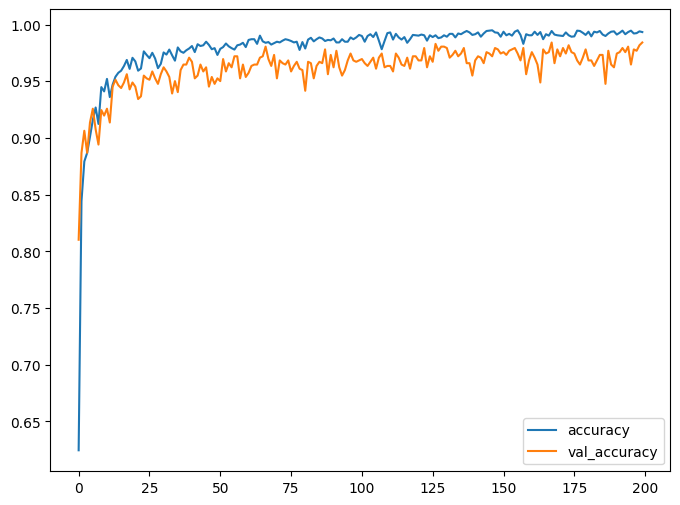

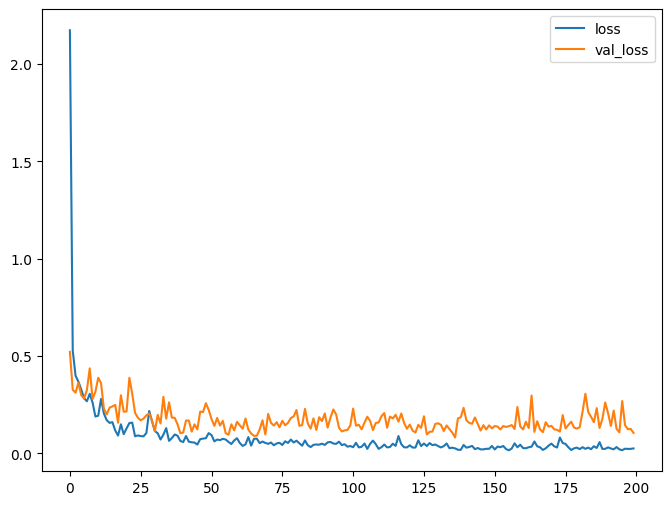

In [21]:
accuracyPlot = plt.figure()
plt.close('all')
plt.figure(1, figsize=(8,6))
plt.plot(hist.history['accuracy'],label = 'accuracy')
plt.plot(hist.history['val_accuracy'],label = 'val_accuracy')
plt.legend()
#plt.savefig('PartClassification/AccuracyNet1.png', dpi=300)

plt.figure(2, figsize=(8,6))
plt.plot(hist.history['loss'],label = 'loss')
plt.plot(hist.history['val_loss'],label = 'val_loss')
plt.legend()
#plt.savefig('PartClassification/LossNet1.png', dpi=300)
plt.show()

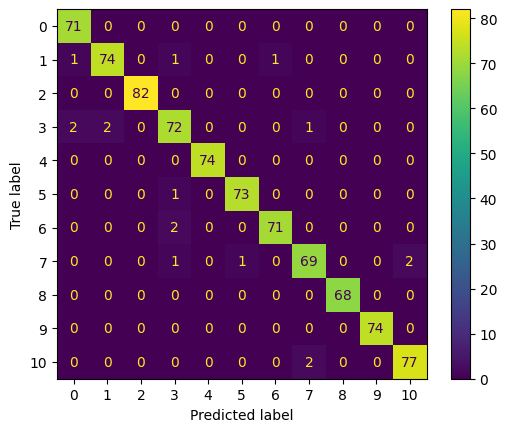

In [22]:
predictY = model.predict(testX).argmax(axis=1)
testY = np.argmax(testY_cat, axis=-1)
conf_matrix = confusion_matrix(testY,predictY)
ConfusionMatrixDisplay.from_predictions(testY,predictY)